# BUSSINESS UNDERSTANDING

dataset : https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera

model ini dibuat untuk mendapatkan prediksi hasil produksi/panen padi di sumatera dalam satuan ton dengan inputan :

Luas tanah pertanian (Hektar)

Jumlah rata-rata curah hujan dalam setahun (milimeter)

Tingkat kelembaban rata-rata dalam setahun (persentase)

Derajat suhu rata-rata dalam setahun (celsius)


diharapkan model ini akan membantu petani padi sumatera untuk mengetahui prediksi hasil panen padi.

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READ DATA
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

# DATA UNDERSTANDING

Total data adalah 224 yang mana untuk setiap provinsi memiliki 28 data tahunan.

Dataset terdiri dari atribut berikut:

Provinsi: Nama provinsi

Tahun : Tahun produksi padi

Produksi: Hasil produksi atau panen tahunan (ton)

Luas Panen: Luas Pertanian (hektar)

Curah hujan: Jumlah rata-rata curah hujan dalam setahun (milimeter)

Kelembaban: Tingkat kelembaban rata-rata dalam setahun (persentase)

Suhu Rata-Rata: Derajat suhu rata-rata dalam setahun (celsius)

Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia

In [3]:
#menampilkan data
df.head()

,Provinsi,Tahun,Produksi,Luas_Panen,Curah_hujan,Kelembapan,Suhu_rata_rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [4]:
#deskripsi jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas_Panen      224 non-null    float64
 4   Curah_hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu_rata_rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tahun,224.0,2.006500e+03,8.095838e+00,1993.00,1999.7500,2006.500,2013.25,2020.00
Produksi,224.0,1.679701e+06,1.161387e+06,42938.00,548857.0000,1667773.000,2436850.75,4881089.00
Luas_Panen,224.0,3.743500e+05,2.327512e+05,63142.04,146919.5000,373551.500,514570.25,872737.00
Curah_hujan,224.0,2.452491e+03,1.031973e+03,222.50,1703.5250,2315.700,3039.70,5522.00
Kelembapan,224.0,8.094871e+01,4.878680e+00,54.20,78.9750,82.375,84.00,90.60
Suhu_rata_rata,224.0,2.680196e+01,1.197041e+00,22.19,26.1775,26.730,27.20,29.85


<Axes: >

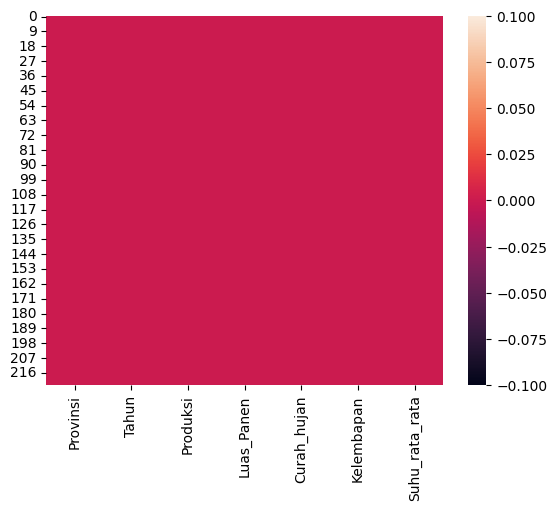

In [6]:
#cek missing data
sns.heatmap(df.isnull())

<Axes: >

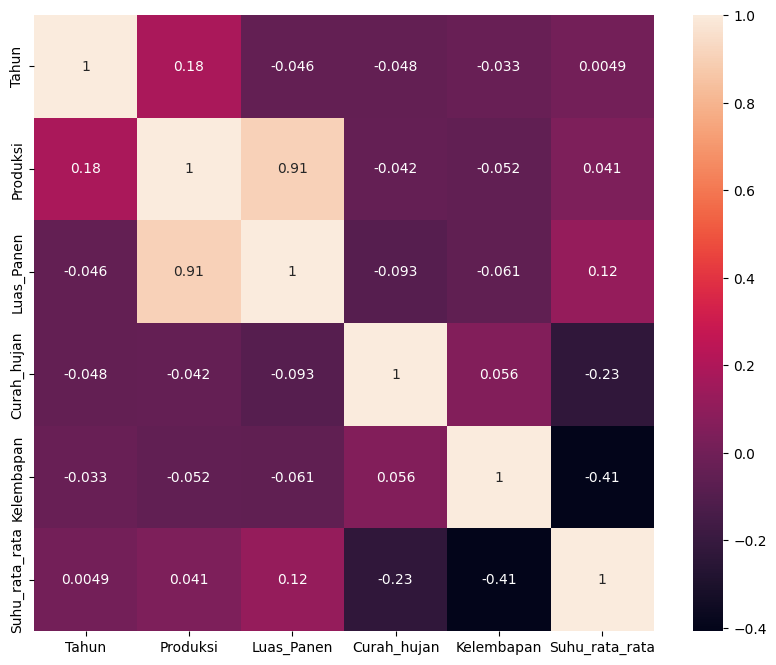

In [7]:
#korelasi data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# DATA PREPARATION

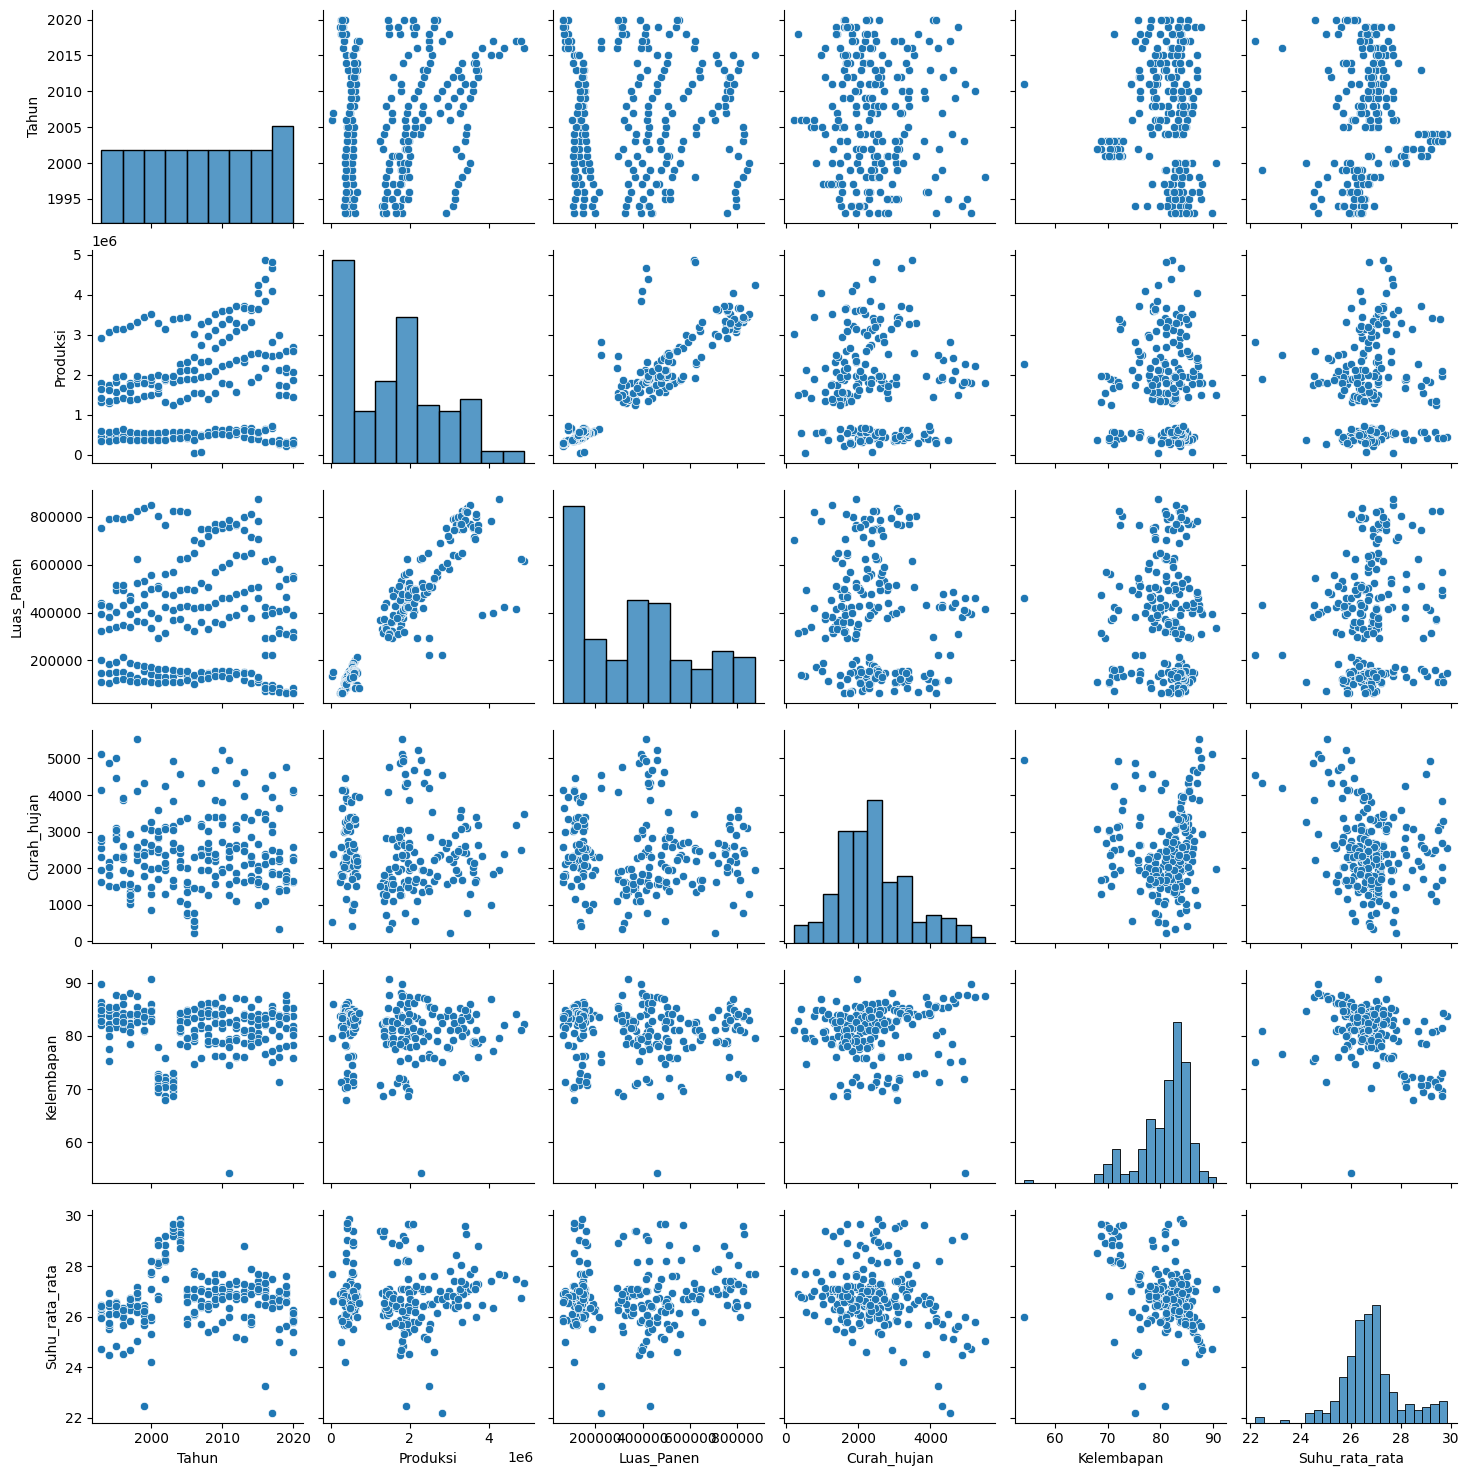

In [8]:
sns.pairplot(df)

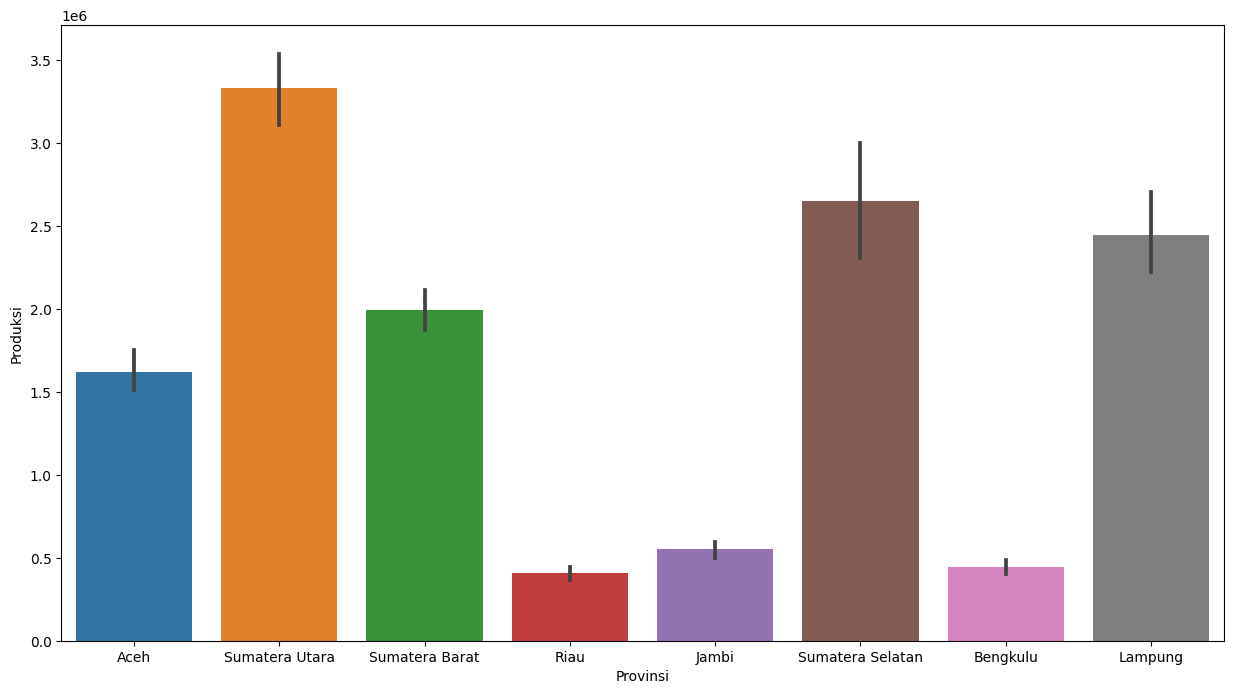

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x='Provinsi', y='Produksi', data=df)
plt.show()

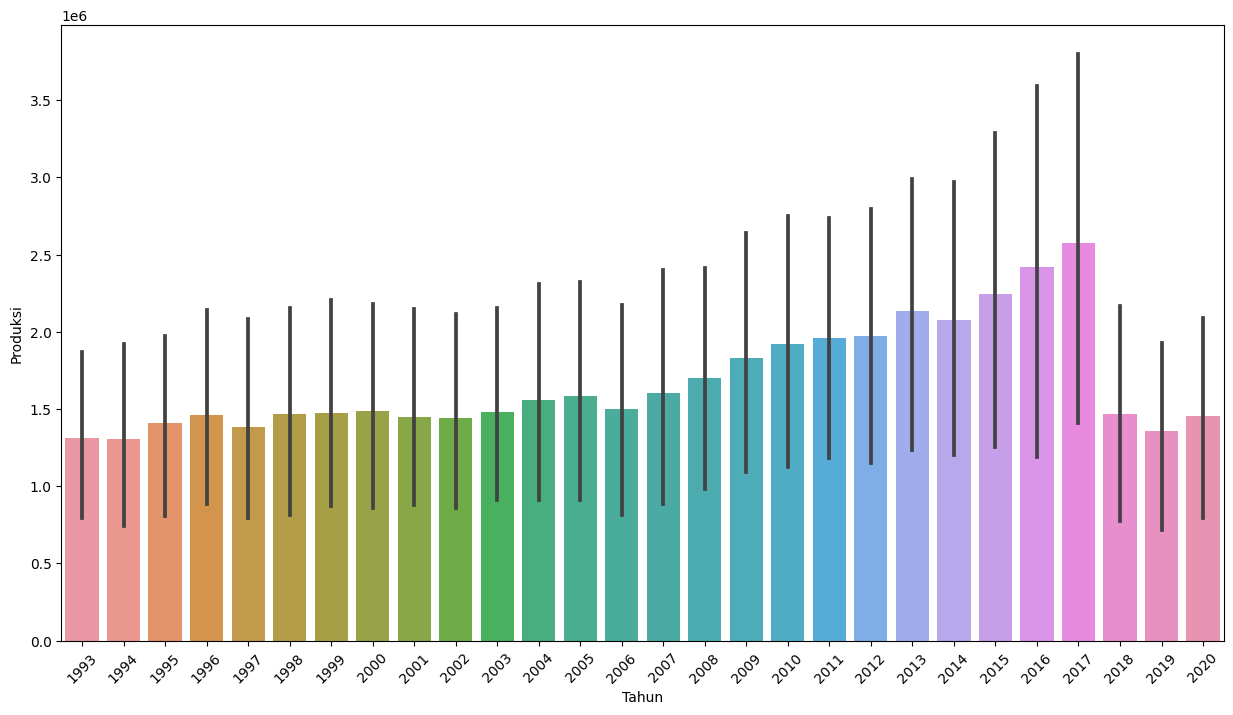

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun',y='Produksi',data=df)
plt.xticks(rotation=45)
plt.show()

In [11]:
df = df.drop(['Provinsi','Tahun'], axis=1)

# MODELLING

In [12]:
df.columns

Index(['Produksi', 'Luas_Panen', 'Curah_hujan', 'Kelembapan',
       'Suhu_rata_rata'],
      dtype='object')

In [13]:
#SELEKSI FITUR
features = ['Luas_Panen', 'Curah_hujan','Kelembapan', 'Suhu_rata_rata']
x = df[features]
y = df['Produksi']
x.shape, y.shape

((224, 4), (224,))

In [14]:
#SPLIT DATA TRAINING DAN DATA TESTING
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(56,)

In [15]:
#MEMBUAT MODEL REGRESI LINIER
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [16]:
#TESTING AKURASI MODEL
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  86.63623649914514 %


# EVALUATION

In [17]:
# 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata'
# 348223.0, 1557.0, 83.00, 26.08
# Produksi = 1419128.0
input_data = np.array([[348223.0, 1557.0, 83.00, 26.08]]) # type: ignore
prediction = lr.predict(input_data)
print('Estimasi Nilai Siswa :', prediction)

Estimasi Nilai Siswa : [1545085.92141251]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# SAVE MODEL

In [18]:
import pickle

filename = 'estimasi_padi.sav'
pickle.dump(lr,open(filename,'wb'))